<a href="https://colab.research.google.com/github/atharvaa45/Exploratory-Data-Analysis/blob/main/21BDS0135_EDA_Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis Theory Digital Assignment**

Name: Atharva Honrao

Registration Number: 21BDS0135

Course Name: Exploratory Data Analysis

Slot: C1

GitHub Link: https://github.com/atharvaa45/Exploratory-Data-Analysis



# Module 1 Introduction to Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import os

# Current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# Set the dataset path (adjust for your environment if needed)
df_path = os.path.join(cwd, "/content/sample_data/drug200.csv")

# Load the dataset
df = pd.read_csv(df_path)

Current working directory: /content


In [3]:
# Display the first few rows of the dataset
display(df.head())

# Display a random sample of 5 rows for variety
display(df.sample(5))

# Display dataset information
display(df.info())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
131,52,M,LOW,NORMAL,32.922,DrugY
191,23,M,HIGH,HIGH,8.011,drugA
75,26,M,LOW,NORMAL,20.909,DrugY
177,25,M,NORMAL,HIGH,19.011,DrugY
118,32,F,HIGH,NORMAL,10.292,drugA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


None

# Module 2: Data Transformation

In [4]:
## Checking for duplicate values

print(f"Number of duplicate records in this dataset is: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate records found.")

Number of duplicate records in this dataset is: 0
No duplicate records found.


In [5]:
# Replacing '?' with NaN
df.replace('?', np.nan, inplace=True)

# Checking for null values
display(df.isna().sum())
display(df.isna().sum().sum())

# Total null values count
total_null = df.isna().sum().sum()
print(f"Total null values in this dataset are {total_null}")

,0
Age,0
Sex,0
BP,0
Cholesterol,2
Na_to_K,0
Drug,2


4

Total null values in this dataset are 4


In [6]:
# Filling missing values in 'Na_to_K' with its mean
df["Na_to_K"].fillna(df["Na_to_K"].mean(), inplace=True)

# Converting 'Na_to_K' to numeric (ensures valid numeric format)
df['Na_to_K'] = pd.to_numeric(df['Na_to_K'], errors='coerce')

# Creating bins for 'Na_to_K' into three categories
df['Na_to_K_bins'] = pd.cut(df['Na_to_K'], bins=3, labels=['Low', 'Medium', 'High'])

# Displaying the updated dataset
display(df.head())

<ipython-input-6-578b6c3443eb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Na_to_K"].fillna(df["Na_to_K"].mean(), inplace=True)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_bins
0,23,F,HIGH,HIGH,25.355,DrugY,Medium
1,47,M,LOW,HIGH,13.093,drugC,Low
2,47,M,LOW,HIGH,10.114,drugC,Low
3,28,F,NORMAL,HIGH,7.798,drugX,Low
4,61,F,LOW,HIGH,18.043,DrugY,Medium


# Module 3: Correlation Analysis and Time Series Analysis

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


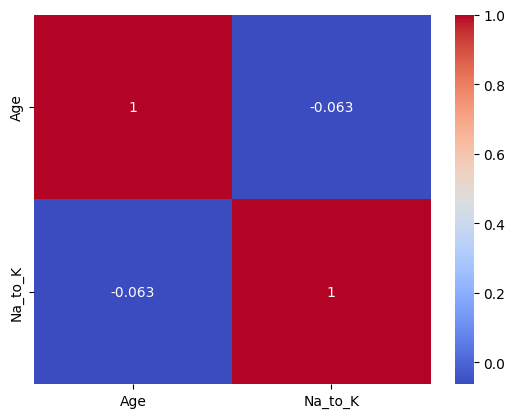

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dropping non-numeric columns
df_corr = df.select_dtypes(include=[np.number])

# Displaying the correlation matrix
display(df_corr.corr())

# Plotting the heatmap of correlations
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

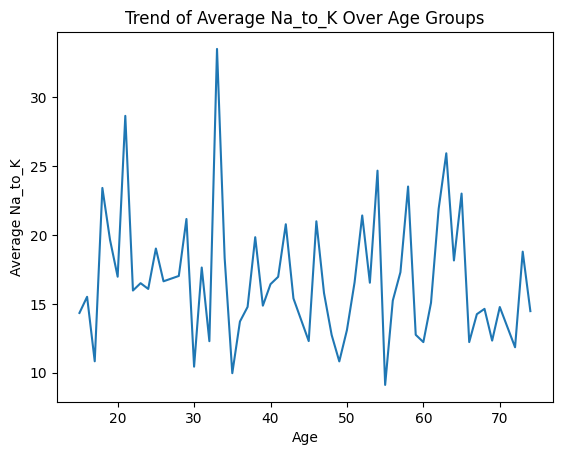

In [9]:
# Grouping by 'Age' and calculating the mean of 'Na_to_K'
df.groupby('Age')['Na_to_K'].mean().plot()

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Average Na_to_K')
plt.title('Trend of Average Na_to_K Over Age Groups')

# Displaying the plot
plt.show()

# Module:4 Data Summarization and Visualization

In [10]:
# Selecting numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(exclude=[np.number]).columns


Summary statistics for numerical features:


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


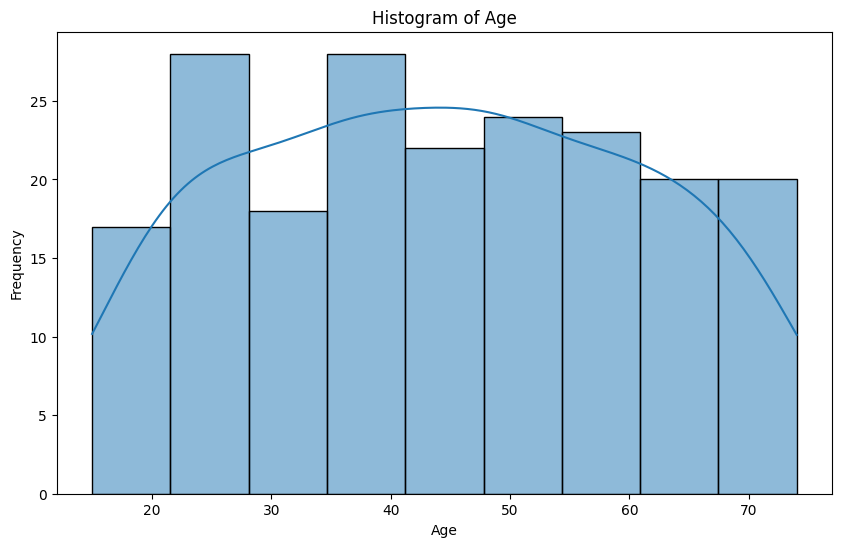

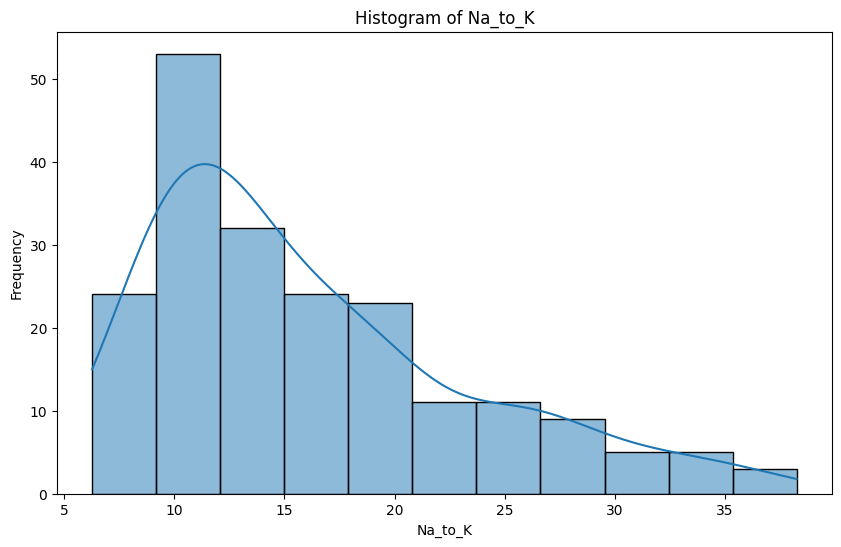

In [11]:
# Function to plot histograms for numerical features
def plot_numerical(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Calculate and print summary statistics for numerical features
print("\nSummary statistics for numerical features:")
display(df[numerical_features].describe())

# Plot histograms for numerical features
plot_numerical(df, numerical_features)


Frequency counts for categorical features:

Sex:
Sex
M    104
F     96
Name: count, dtype: int64

BP:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol:
Cholesterol
HIGH      102
NORMAL     96
Name: count, dtype: int64

Drug:
Drug
DrugY    89
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Na_to_K_bins:
Na_to_K_bins
Low       129
Medium     53
High       18
Name: count, dtype: int64


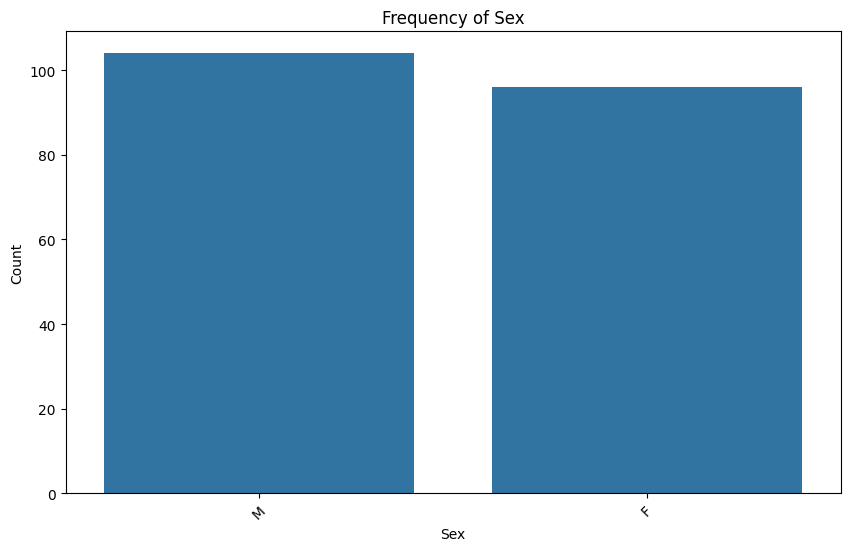

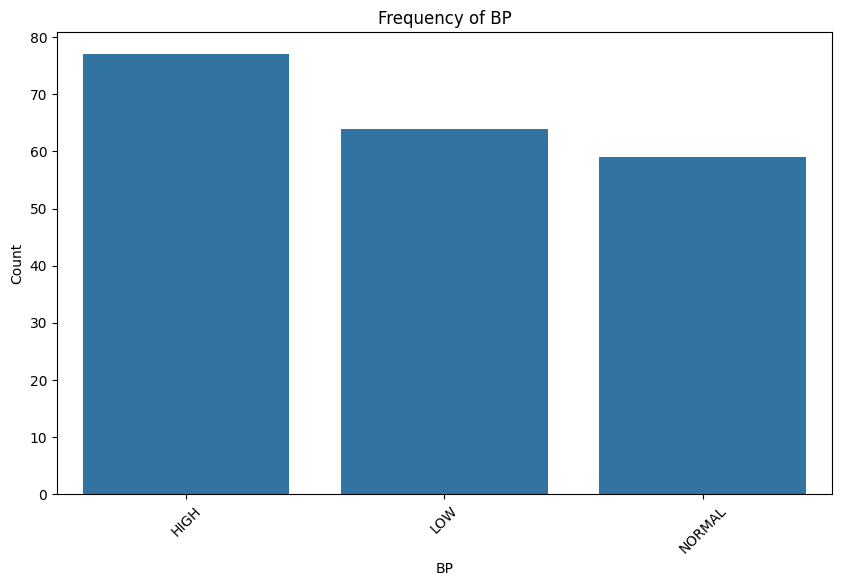

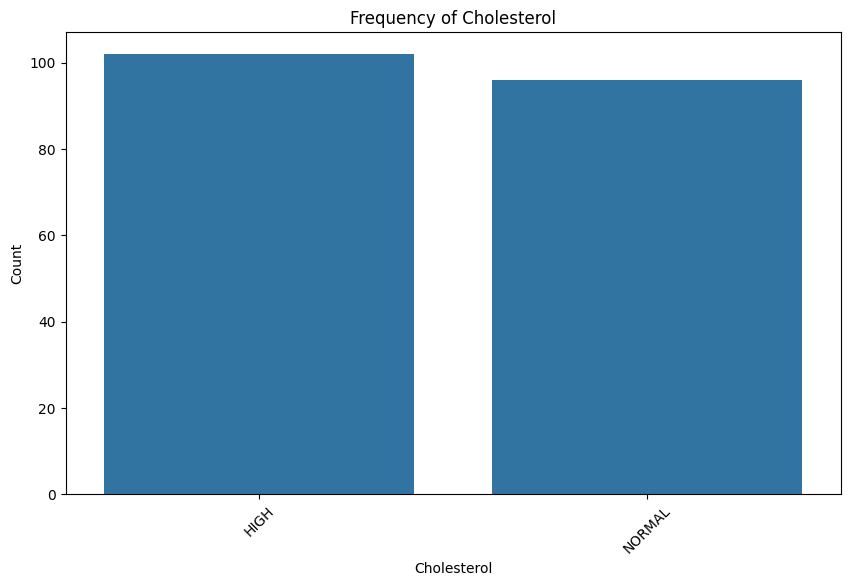

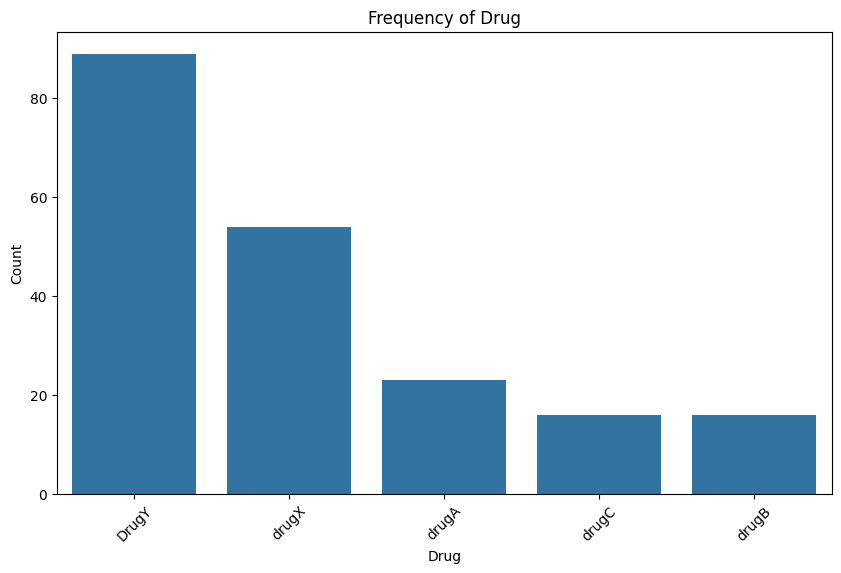

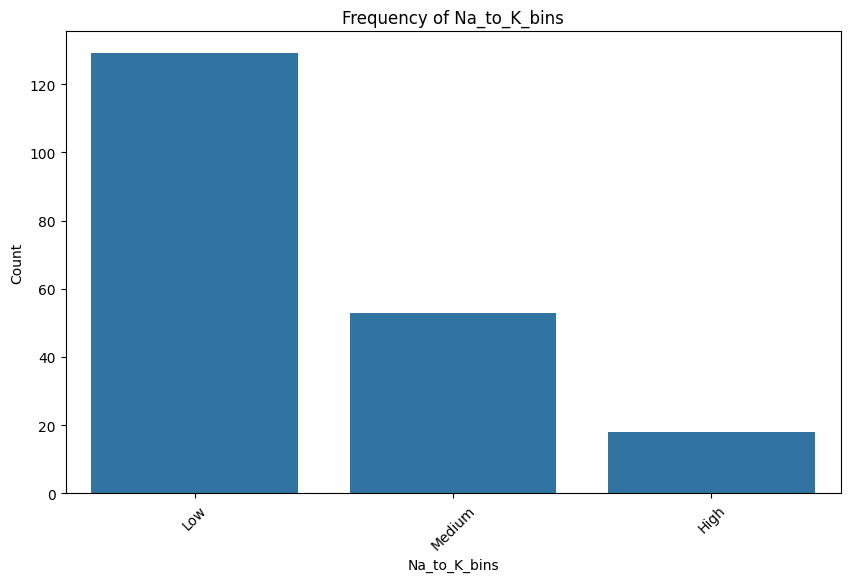

In [12]:
# Function to plot bar charts for categorical features
def plot_categorical(df, columns):
    for col in columns:
        counts = df[col].value_counts()
        plt.figure(figsize=(10,6))
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Calculate and print frequency counts for categorical features
print("\nFrequency counts for categorical features:")
for cat in categorical_features:
    print(f"\n{cat}:\n{df[cat].value_counts()}")

# Plot bar charts for categorical features
plot_categorical(df, categorical_features)

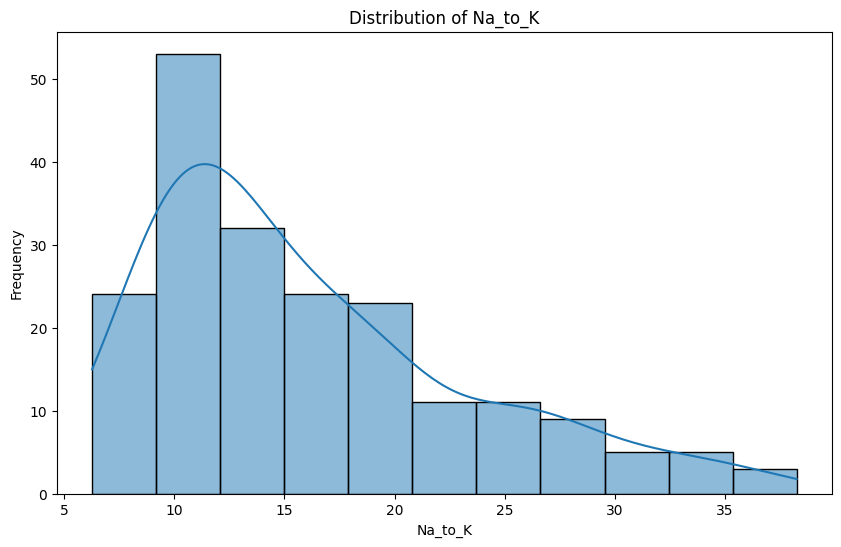

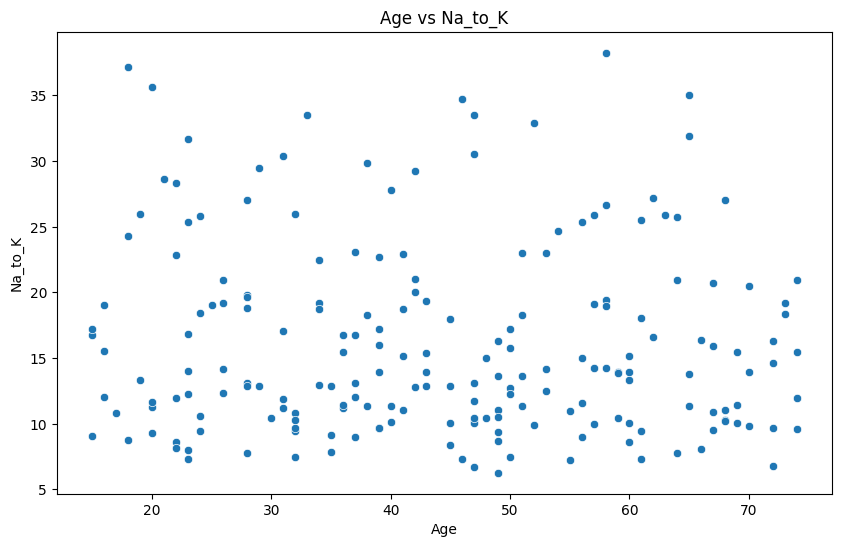

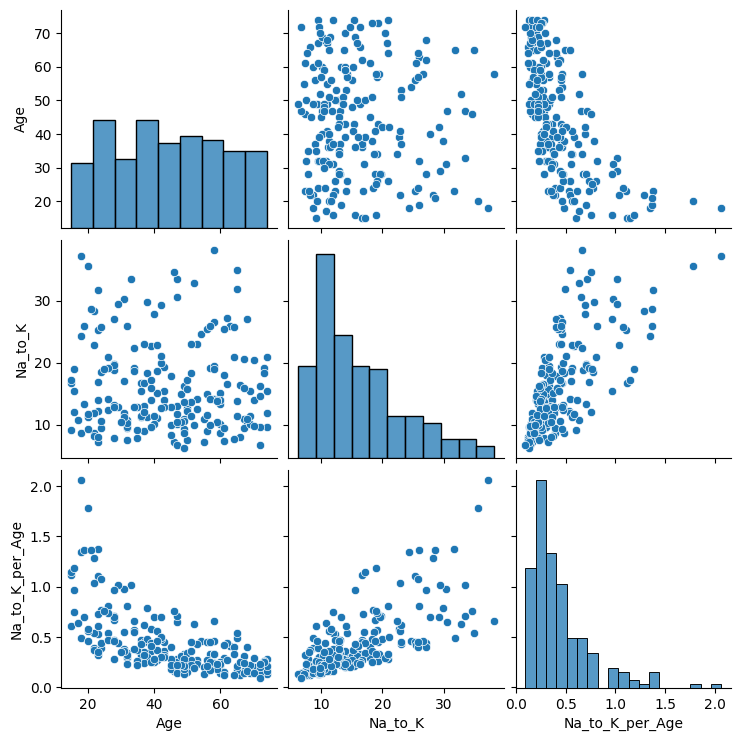


Contingency Table of Sex vs BP:
BP   HIGH  LOW  NORMAL
Sex                   
F      38   28      30
M      39   36      29


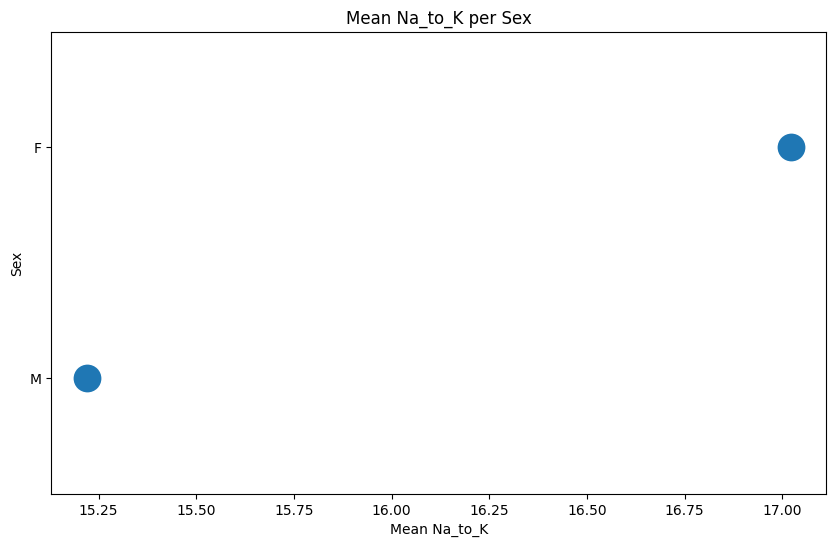

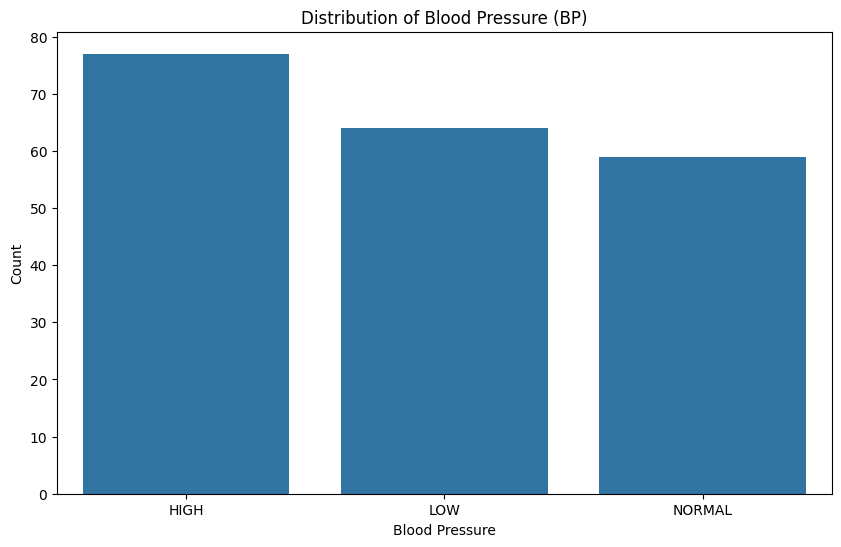

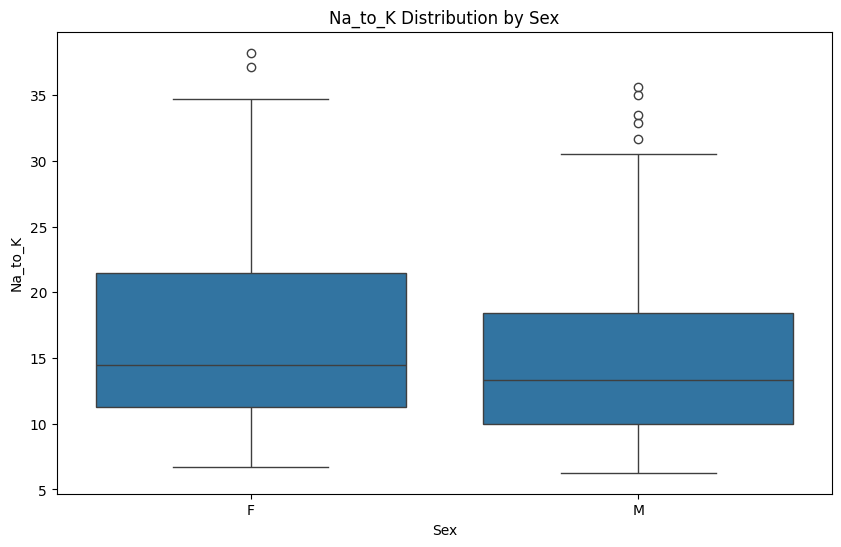

In [13]:
# 1. Data elaboration: Create a new variable, e.g., Na_to_K per Age
df['Na_to_K_per_Age'] = df['Na_to_K'] / df['Age']

# 2. 1-D Statistical Data Analysis: Distribution of Na_to_K
plt.figure(figsize=(10,6))
sns.histplot(df['Na_to_K'], kde=True)
plt.title('Distribution of Na_to_K')
plt.xlabel('Na_to_K')
plt.ylabel('Frequency')
plt.show()

# 3. 2-D Statistical Data Analysis: Scatter plot of Na_to_K vs Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Na_to_K', data=df)
plt.title('Age vs Na_to_K')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

# 4. n-D Statistical Data Analysis: Pair plot of selected variables
variables = ['Age', 'Na_to_K', 'Na_to_K_per_Age']
sns.pairplot(df[variables])
plt.show()

# 5. Contingency tables: Cross-tabulation of Sex and BP
contingency_table = pd.crosstab(df['Sex'], df['BP'])
print("\nContingency Table of Sex vs BP:")
print(contingency_table)

# 6. Visualization: Dot chart of mean Na_to_K per Sex
mean_Na_to_K_sex = df.groupby('Sex')['Na_to_K'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.stripplot(x='Na_to_K', y='Sex', data=mean_Na_to_K_sex, size=20, jitter=False)
plt.title('Mean Na_to_K per Sex')
plt.xlabel('Mean Na_to_K')
plt.ylabel('Sex')
plt.show()

# 7. Visualization: Bar plot of BP distribution
plt.figure(figsize=(10,6))
sns.countplot(x='BP', data=df)
plt.title('Distribution of Blood Pressure (BP)')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

# 8. Additional analysis: Box plot for Na_to_K distribution by Sex
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex', y='Na_to_K', data=df)
plt.title('Na_to_K Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Na_to_K')
plt.show()

# Module 5: Clustering Algorithms

In [14]:
# Corrected imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import SpectralClustering, AgglomerativeClustering

In [15]:
# Exclude 'car_name' (if it exists in the dataset) and ensure relevant categorical features are encoded
df2 = df.drop('car_name', axis=1, errors='ignore')  # Ignore error if 'car_name' doesn't exist

# Encode categorical variables (Sex, BP, Cholesterol) if they are categorical
df2['Sex'] = pd.Categorical(df2['Sex']).codes  # Convert 'Sex' to numerical
df2['BP'] = pd.Categorical(df2['BP']).codes  # Convert 'BP' to numerical
df2['Cholesterol'] = pd.Categorical(df2['Cholesterol']).codes  # Convert 'Cholesterol' to numerical

# Select features for clustering
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

# Extract the features
X = df2[features]

# Fill missing values if any (assuming 'Na_to_K' could have missing values)
X["Na_to_K"].fillna(method="ffill", inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now X_scaled is ready for clustering

<ipython-input-15-0ccfbeb4809d>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Na_to_K"].fillna(method="ffill", inplace=True)
<ipython-input-15-0ccfbeb4809d>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X["Na_to_K"].fillna(method="ffill", inplace=True)
<ipython-input-15-0ccfbeb4809d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [17]:
# Compute the distance matrix using Euclidean distance
dist_matrix = distance.pdist(X_scaled, metric='euclidean')

# Perform hierarchical clustering using the 'single' linkage method
Z = linkage(dist_matrix, method='single')

# Form clusters (t=3 specifies 3 clusters, adjust as needed)
clusters_mst = fcluster(Z, t=3, criterion='maxclust')

# Evaluate the clustering using silhouette score
silhouette_mst = silhouette_score(X_scaled, clusters_mst)

# Print the silhouette score for MST clustering
print(f'Silhouette Score for MST Clustering: {silhouette_mst}')

Silhouette Score for MST Clustering: 0.19500121839546544


In [18]:
# Apply Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)

# Print the silhouette score for GMM clustering
print(f'Silhouette Score for GMM: {silhouette_gmm}')

Silhouette Score for GMM: 0.17784790623019975


In [19]:
# Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agglo = agglo.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_agglo = silhouette_score(X_scaled, clusters_agglo)

# Print the silhouette score for Agglomerative Clustering
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')

Silhouette Score for Agglomerative Clustering: 0.20290655316622647


# Module 6

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_digits
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
from scipy.linalg import svd
from sklearn.metrics import silhouette_score

In [22]:
# Load the dataset
df = pd.read_csv(df_path)

# Handle missing values
# Fill missing 'Cholesterol' and 'Drug' values with the mode (since they are categorical)
df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
df['Drug'].fillna(df['Drug'].mode()[0], inplace=True)

# Encode categorical variables (Sex, BP, Cholesterol)
df = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Select numerical features
features = ['Age', 'Na_to_K']  # Add encoded categorical columns for full analysis
features += [col for col in df.columns if col not in ['Age', 'Na_to_K', 'Drug']]
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
print(pd.DataFrame(X_scaled, columns=features).head())

        Age   Na_to_K     Sex_M    BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0 -1.291591  1.286522 -1.040833 -0.685994  -0.646869          0.970437   
1  0.162699 -0.415145  0.960769  1.457738  -0.646869          0.970437   
2  0.162699 -0.828558  0.960769  1.457738  -0.646869          0.970437   
3 -0.988614 -1.149963 -1.040833 -0.685994   1.545908          0.970437   
4  1.011034  0.271794 -1.040833  1.457738  -0.646869          0.970437   

   Cholesterol_NORMAL  
0           -0.960769  
1           -0.960769  
2           -0.960769  
3           -0.960769  
4           -0.960769  


<ipython-input-22-60eca778058e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
<ipython-input-22-60eca778058e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

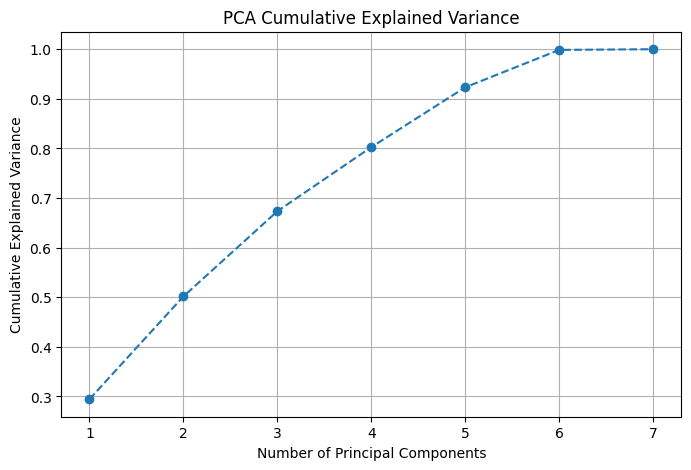

Principal Component 1: 0.2944
Principal Component 2: 0.2072
Principal Component 3: 0.1718
Principal Component 4: 0.1292
Principal Component 5: 0.1206
Principal Component 6: 0.0754
Principal Component 7: 0.0014


In [23]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Display explained variance for each component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

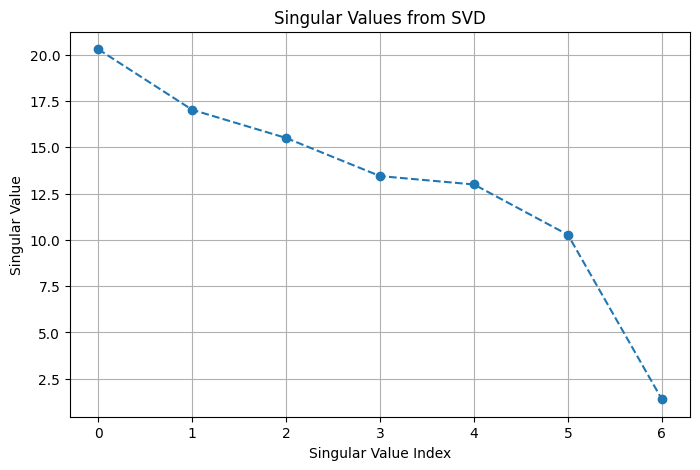

Singular Value 1: 20.3022
Singular Value 2: 17.0305
Singular Value 3: 15.5075
Singular Value 4: 13.4486
Singular Value 5: 12.9952
Singular Value 6: 10.2771
Singular Value 7: 1.3928


In [24]:
# Perform Singular Value Decomposition (SVD)
U, Sigma, Vt = svd(X_scaled, full_matrices=False)

# Plot singular values
plt.figure(figsize=(8, 5))
plt.plot(Sigma, marker='o', linestyle='--')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.grid(True)
plt.show()

# Display the first few singular values
for i, singular_value in enumerate(Sigma[:10]):
    print(f"Singular Value {i + 1}: {singular_value:.4f}")

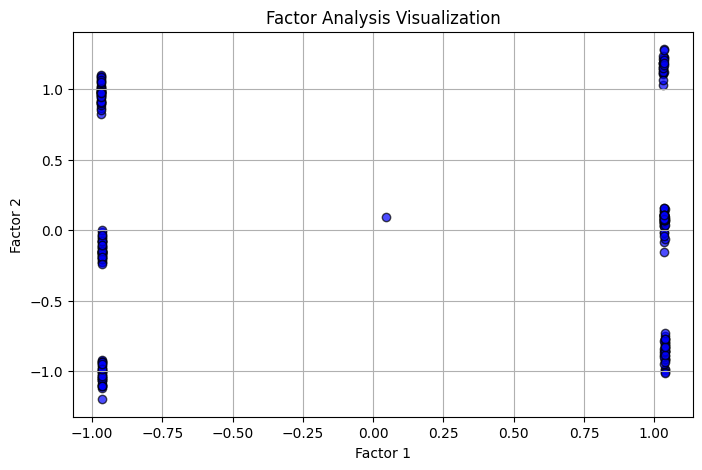

In [25]:
# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

# Visualize Factor Analysis results
plt.figure(figsize=(8, 5))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c='blue', alpha=0.7, edgecolors='k')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis Visualization')
plt.grid(True)
plt.show()

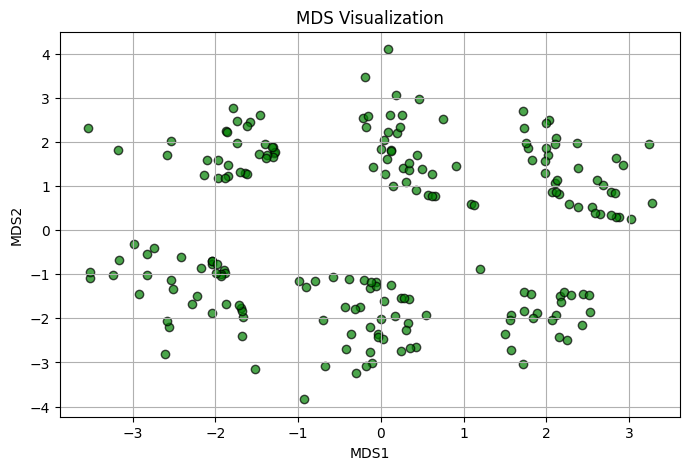

In [26]:
# Apply Multi-Dimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Visualize MDS results
plt.figure(figsize=(8, 5))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='green', alpha=0.7, edgecolors='k')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS Visualization')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


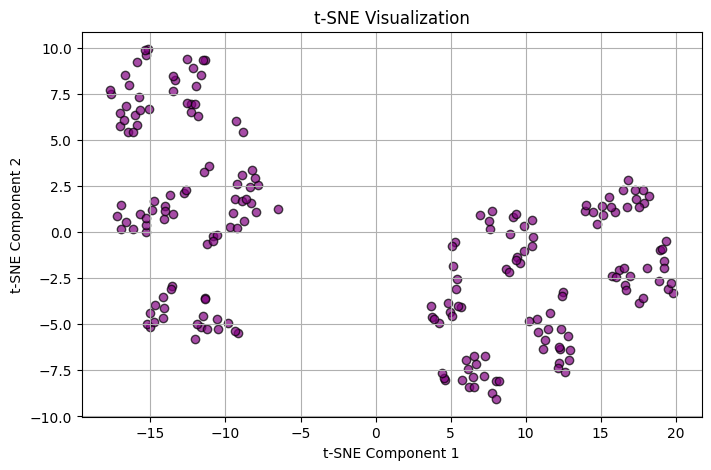

In [27]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='purple', alpha=0.7, edgecolors='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

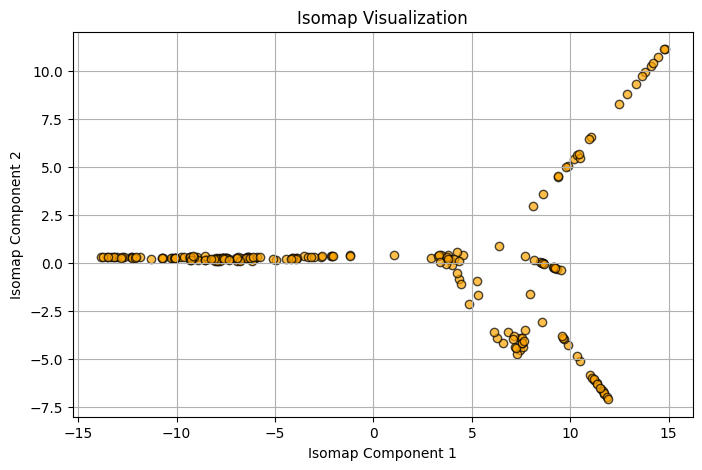

In [28]:
# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)

# Visualize Isomap results
plt.figure(figsize=(8, 5))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c='orange', alpha=0.7, edgecolors='k')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap Visualization')
plt.grid(True)
plt.show()

# Module 7: Model Development and Evaluation

Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64
Mean Squared Error (MSE): 0.8553
Mean Absolute Error (MAE): 0.7711
R-squared (R2): 0.6972


<ipython-input-31-11e725234efc>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
<ipython-input-31-11e725234efc>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

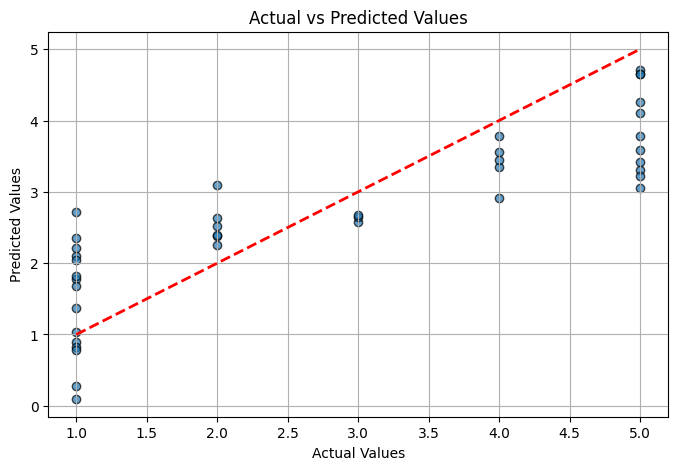

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(df_path)  # Make sure to specify the correct path if needed

# Check for missing values
print(df.isnull().sum())

# Handle missing values
df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
df['Drug'].fillna(df['Drug'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()

# Encode 'Sex' and 'BP' columns (assuming they are categorical)
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['BP_encoded'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol_encoded'] = label_encoder.fit_transform(df['Cholesterol'])

# Encode the target variable 'Drug'
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])  # Encoding the target variable

# Select features and target variable
features = ['Age', 'Na_to_K', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded']
X = df[features]
y = df['Drug_encoded']  # Use the encoded target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [33]:
# Check column names in your dataset
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Handle missing values
df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
df['Drug'].fillna(df['Drug'].mode()[0], inplace=True)

# Encode categorical columns (e.g., 'Sex', 'BP', 'Drug' if needed)
# Encode 'Sex' and 'BP' if they are categorical
label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['BP_encoded'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol_encoded'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])

# Select features and target variable
features = ['Age', 'Na_to_K', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded']  # Adjusted for your dataset
X = df[features]
y = df['Drug_encoded']  # Target variable is now encoded as Drug_encoded

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Understanding Accuracy in Regression
# R-squared can be interpreted as the proportion of variance explained by the model
print('R-squared (proportion of variance explained):', r2)

Mean Squared Error: 0.855263541678917
Root Mean Squared Error: 0.9248045964845315
Mean Absolute Error: 0.7711167985756769
R-squared: 0.6971848491510805
R-squared (proportion of variance explained): 0.6971848491510805


<ipython-input-34-00ea1a39bbe8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
<ipython-input-34-00ea1a39bbe8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl